<a href="https://colab.research.google.com/github/aldojda/MachineLearningUANL/blob/main/Tarea_5_ML_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 5 : Unsupervised Learning

* Aplicar al menos un algoritmo no supervisado a tus datos para encontrar estructuras subyacentes

* Elegir alguna métrica para determinar número de grupos, usarla y discutirla

* Busca alguna revista científica que publique trabajos relacionados con el tuyo

* Crea artículo mediante Latex con base en los lineamientos de la revista elegida y redacta ahí tus resultados, discusiones y bibliografía

* Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados


Tarea 7 

 - Generar la parte de metodología del artículo, explicando los métodos usados con base en la literatura que los sustenta (10 pts)

## Transformación de Datos

In [28]:
#iportamos google coolab para trabajar con archivos de Drive
from google.colab import drive
drive.mount("/content/gdrive")

#importamos librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("gdrive/MyDrive/01 - Maestría Ciencia de Datos/MachineLearningUANL/Tareas/ChurnDataSet.csv")
df.set_index('customerID', inplace = True)

def transform_float(x):
    try:
        x = float(x)
        return x
    except:
        return None
        
df.loc[:,'TotalCharges'] = df.loc[:,'TotalCharges'].apply(lambda x: transform_float(x))
df.loc[:,'TotalCharges'] = df.loc[:,'TotalCharges'].astype(float)

df.head(1)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


## Feature Selection v2
### Categorical variables

Para las variables categóricas realizamos un análisis de selección de características para saber cual de estas variables está relacionada con
la variable de clasificación (Churn), para ello utilizaremos la prueba $\chi^2$.

$$\chi^2 = \Sigma \frac{(O_i-E_i)^2}{E_i}$$
partiendo de la siguiente prueba de Hipótesis,

$H_0$: No hay relación significativa entre las variables

$H_a$: Hay relación significativa entre las variables

donde, se rechaza la hipótesis nula si :

$$\chi^2 > \chi^2_{0.05, df}$$  


o 

$$p-value < 0.05$$ 


In [29]:
#forma 1 de realizar la prueba
from sklearn.feature_selection import chi2

x = df_cat = df.loc[:,df.apply(lambda x: x.nunique()) <= 4]
x = pd.get_dummies(x)
y = df_cat['Churn']
f_score=chi2(x,y)

tab = pd.DataFrame(f_score).T
tab.index = x.columns
tab.columns = ['f_score', 'p_value']
tab.loc[:,'rejectH0'] = np.where(tab['p_value']< 0.05, True, False)
tab.sort_values(by = 'rejectH0')

,f_score,p_value,rejectH0
gender_Female,0.263668,6.076114e-01,False
gender_Male,0.258699,6.110156e-01,False
PhoneService_No,0.907148,3.408723e-01,False
PhoneService_Yes,0.097261,7.551421e-01,False
MultipleLines_No phone service,0.907148,3.408723e-01,False
SeniorCitizen,134.351545,4.576959e-31,True
TechSupport_Yes,135.559783,2.490549e-31,True
StreamingTV_No,70.349516,4.967505e-17,True
StreamingTV_No internet service,286.520193,2.849642e-64,True
StreamingTV_Yes,17.334235,3.134881e-05,True


In [30]:
#forma 2 de realizar el test
from scipy.stats import chi2_contingency
from scipy import stats

df_cat = df.loc[:,df.apply(lambda x: x.nunique()) <= 4]
chi2_tab = []
for i in df_cat.columns[:-1]:
    tab = pd.crosstab(df_cat['Churn'], df_cat[i])
    stat, p, dof, expected = chi2_contingency(tab.values)
    tab = pd.DataFrame({'variable': i,'Chi2':stat,'valor_critico': stats.chi2.isf(0.05,dof) ,'p-valor': p,'df': dof, 'RechazaHo': [True if p<0.05 else False]})
    chi2_tab.append(tab)
pd.concat(chi2_tab).sort_values(by = 'RechazaHo')

,variable,Chi2,valor_critico,p-valor,df,RechazaHo
0,gender,0.484083,3.841459,4.865787e-01,1,False
0,PhoneService,0.915033,3.841459,3.387825e-01,1,False
0,SeniorCitizen,159.426300,3.841459,1.510067e-36,1,True
0,Partner,158.733382,3.841459,2.139911e-36,1,True
0,Dependents,189.129249,3.841459,4.924922e-43,1,True
0,MultipleLines,11.330441,5.991465,3.464383e-03,2,True
0,InternetService,732.309590,5.991465,9.571788e-160,2,True
0,OnlineSecurity,849.998968,5.991465,2.661150e-185,2,True
0,OnlineBackup,601.812790,5.991465,2.079759e-131,2,True
0,DeviceProtection,558.419369,5.991465,5.505219e-122,2,True


In [31]:
df.drop(columns = ['gender', 'PhoneService'], inplace = True)

### 1.1 Codificamos Data: One-Hot Encoding

<Axes: >

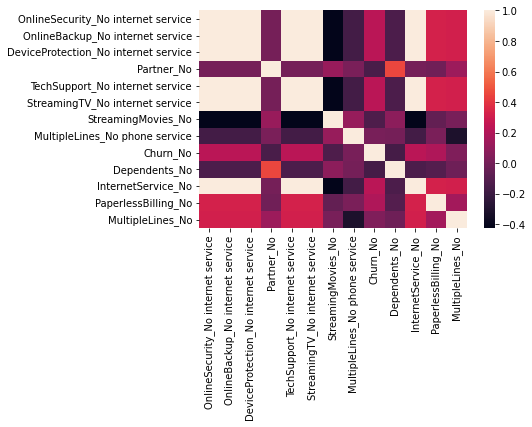

In [32]:
#codificamos variables categóricas
df_encode = pd.get_dummies(df, columns = ['Partner', 'Dependents', 'MultipleLines','InternetService',
                                                      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 
                                                     'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod', 'Churn'])
#Eliminamos columnas redudundantes correlaciones (+1 y -1), sólo nos quedaremos con 1 de ellas para evitar este problema
cat2del = ['OnlineSecurity_No internet service',
            'OnlineBackup_No internet service',
            'DeviceProtection_No internet service',
            'Partner_No',
            'TechSupport_No internet service', 'StreamingTV_No internet service',
            'StreamingMovies_No',
        'MultipleLines_No phone service','Churn_No','Dependents_No',
        'InternetService_No', 'PaperlessBilling_No', 'MultipleLines_No']
    #plt.figure(figsize=(16, 16))
#heatmap = sns.heatmap(df_encode.corr().round(2), vmin=-1, vmax=1, annot=False)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

sns.heatmap(df_encode[cat2del].corr())

como podemos observar en la matriz de correlación existen columnas **Redundantes** las cuales al codificar los valores de cada una nos dan valores de correlación igual a 1,  lo podemos ver en la gráfica como los colores blanco y negro.

guardaremos estos valores redundantes en una lista para desecharlos luego.

In [33]:
print(df_encode.shape)
df_ = df_encode.drop(columns = cat2del)
print(df_.shape)
df_ = df_.dropna()

(7043, 43)
(7043, 30)


In [34]:
X = df_.iloc[:,:-1]
y = df_.iloc[:,-1]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## Feature Selection categoricas y Numéricas



In [35]:
#!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

sfs = SFS(estimator = lr,        # Use logistic regression as the classifier/estimator
            k_features=20, 
          forward=True,
          scoring =  'roc_auc',  # The metric to use to evaluate the classifier is accuracy 
          cv = 5)

In [36]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [37]:
sfs = sfs.fit(X,y)

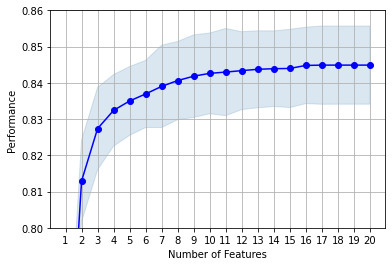

In [38]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 0.86])
#plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.savefig("sfs.pdf")
plt.show()

In [39]:
tab = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
tab.head(10)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.750808868826066, 0.7384881788674283, 0.7284...",0.741415,"(1,)",0.012881,0.010022,0.005011
2,"(1, 8)","[0.8182219380755911, 0.8319636487878614, 0.799...",0.812914,"(1, 8)",0.014489,0.011273,0.005636
3,"(1, 8, 21)","[0.8334894989413525, 0.8457467735840266, 0.814...",0.827376,"(1, 8, 21)",0.014599,0.011358,0.005679
4,"(1, 8, 9, 21)","[0.8430354452790533, 0.845116502994756, 0.8219...",0.832405,"(1, 8, 9, 21)",0.012679,0.009865,0.004932
5,"(1, 8, 9, 21, 27)","[0.8475353443322238, 0.8455177019324848, 0.825...",0.834995,"(1, 8, 9, 21, 27)",0.012203,0.009494,0.004747
6,"(1, 3, 8, 9, 21, 27)","[0.8489162451920838, 0.8472803888782476, 0.828...",0.836937,"(1, 3, 8, 9, 21, 27)",0.011912,0.009268,0.004634
7,"(1, 3, 8, 9, 15, 21, 27)","[0.8542444259231459, 0.85144768107014, 0.82952...",0.839025,"(1, 3, 8, 9, 15, 21, 27)",0.014594,0.011355,0.005677
8,"(1, 3, 8, 9, 15, 21, 24, 27)","[0.8545511489819902, 0.8531068328061665, 0.831...",0.840627,"(1, 3, 8, 9, 15, 21, 24, 27)",0.01387,0.010791,0.005396
9,"(1, 3, 8, 9, 15, 21, 23, 24, 27)","[0.8562491264216678, 0.8552681303094151, 0.832...",0.841837,"(1, 3, 8, 9, 15, 21, 23, 24, 27)",0.014634,0.011386,0.005693
10,"(1, 3, 8, 9, 15, 18, 21, 23, 24, 27)","[0.8565157295867392, 0.8560058186787871, 0.833...",0.842618,"(1, 3, 8, 9, 15, 18, 21, 23, 24, 27)",0.014328,0.011148,0.005574


In [40]:
features2select =list(df_.columns[list(tab.iloc[9,:].feature_idx)])
features2select

['tenure',
 'TotalCharges',
 'InternetService_Fiber optic',
 'OnlineSecurity_No',
 'TechSupport_No',
 'StreamingTV_Yes',
 'Contract_Month-to-month',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Electronic check']

### Discusión de Resultados

De acuerdo con Celik, los métodos para la selección de características más utilizados son los de selección de características secuenciales. En este ejercicio se utilizó un algoritmo de propagación hacia adelante, el cual permite agregar una nueva variable cada iteración.

la métrica utilizada para este análisis es la métrica roc_auc, la cual es comúnmente utilizada en análisis de dos clases, junto con un algoritmo de regresión logística el cual es utilizado para problemas de clasificación y retención de clientes (Fridrich, 2022).
Es de esperar que dentro de las variables más importantes la que tiene mayor participación es la variable de antigüedad, la cual puede explicar muy bien el modelo, por otro lado si el cliente cuenta con fibra óptica nos habla de la calidad del servicio. considero que el tema de un contrato de pago mes a mes permite al cliente poder amortizar el gasto comparado de un pago anual.
la cantidad de variables más representativas para el modelo considero que son hasta 10 las cuales son las siguientes:

```
'tenure',
 'TotalCharges',
 'InternetService_Fiber optic',
 'OnlineSecurity_No',
 'TechSupport_No',
 'StreamingTV_Yes',
 'Contract_Month-to-month',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Electronic check'
```


## Utilizando Algoritmo de Clasificación
En la siguiente sección trabajaremos con 3 modelos de Clasificación No supervisado  (K mediods y K means), con estos dos algortimos calcularemos métricas para ver cual tiene mejores resultados al momento de generar una etiqueta de Churn

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
df_ = df_[features2select]
df_['Churn_Yes'] = y

<ipython-input-42-9f8faf1a51c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Churn_Yes'] = y


In [43]:
X = df_ [features2select].copy()
y = df_.Churn_Yes.copy()

In [44]:
X = scaler.fit_transform(X)

In [45]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)
label_kMedoids = kmedoids.labels_

from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
label_KMeans = kmeans.labels_

from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=2).fit(X)
label_AgC = agc.labels_


tab_exp_kmed = pd.DataFrame({'cluster' : label_kMedoids, 'Churn':y })
tab_exp_kmed['model'] = 'KMedoids'
tab_exp_NNC = pd.DataFrame({'cluster' : label_KMeans, 'Churn':y })
tab_exp_NNC['model'] = 'kMeans'
tab_exp_AgC = pd.DataFrame({'cluster' : label_AgC, 'Churn':y })
tab_exp_AgC['model'] = 'AgC'
results = pd.concat([tab_exp_kmed, tab_exp_NNC, tab_exp_AgC], axis = 0, ignore_index = True)
results['cluster'] = np.where(results['cluster'] == 1, 'A', 'B')

results.groupby(['model', 'cluster']).Churn.value_counts().unstack(-1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Churn                0     1
model    cluster            
AgC      A        1527  1474
         B        3636   395
KMedoids A        3296   339
         B        1867  1530
kMeans   A        3097   249
         B        2066  1620

In [47]:
results['predict'] = np.where(results.model.isin(['AgC']), 
                              np.where(results.cluster == 'A' , 1, 0),
                              np.where(results.cluster == 'A' , 0, 1))

results['label'] = np.where(
    results.Churn == results.predict,
    np.where(
        results.Churn  == 1, 'TP', 'TN'
        ),
        np.where(
            results.Churn  == 1, 'FP', 'FN'
            )
        )

tab_metrics = results.groupby(['model']).label.value_counts().unstack(1).fillna(0)
tab_metrics

label,FN,FP,TN,TP
model,,,,
AgC,1527,395,3636,1474
KMedoids,1867,339,3296,1530
kMeans,2066,249,3097,1620


<Axes: xlabel='model'>

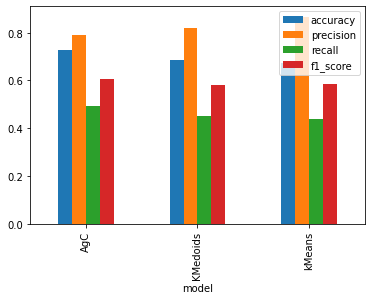

In [48]:
def metrics_(df):
    accuracy = (df['TP']+ df['TN'] )/(df['TP']+ df['TN'] + df['FP']+ df['FN']) 
    precision = (df['TP'] )/(df['TP'] + df['FP']) 
    recall =  (df['TP'] )/(df['TP'] + df['FN']) 
    f1_score = 2 / (1/ recall + 1/ precision)
    return {'accuracy':[accuracy], 'precision' : [precision],'recall' : [recall], 'f1_score':[f1_score]}
    
res = pd.concat(
            [pd.DataFrame.from_dict(metrics_(tab_metrics.iloc[0, :])), 
            pd.DataFrame.from_dict(metrics_(tab_metrics.iloc[1, :])),
            pd.DataFrame.from_dict(metrics_(tab_metrics.iloc[2, :]))],
            axis = 0)
res.index = tab_metrics.index
res.plot(kind = 'bar')

In [49]:
print(res.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  accuracy &  precision &    recall &  f1\_score \\
model    &           &            &           &           \\
\midrule
AgC      &  0.726678 &   0.788657 &  0.491170 &  0.605339 \\
KMedoids &  0.686291 &   0.818620 &  0.450397 &  0.581086 \\
kMeans   &  0.670791 &   0.866774 &  0.439501 &  0.583258 \\
\bottomrule
\end{tabular}



<ipython-input-49-b29449dbfc91>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(res.to_latex())


In [51]:
score_ = []
from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    #centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    score_.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.23587592240232944)
For n_clusters = 3, silhouette score is 0.22858120099086796)
For n_clusters = 4, silhouette score is 0.19723757336917452)
For n_clusters = 5, silhouette score is 0.1622787763690231)
For n_clusters = 6, silhouette score is 0.17610964426282022)
For n_clusters = 7, silhouette score is 0.19583093682571778)
For n_clusters = 8, silhouette score is 0.20679539368620461)
For n_clusters = 9, silhouette score is 0.2024250392565675)


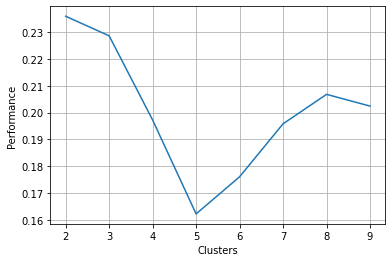

In [53]:
plt.plot(list(range(2,10)) , score_)
plt.grid()
plt.ylabel('Performance')
plt.xlabel('Clusters')
plt.savefig("silho.pdf")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def silhouette_test(X):
    range_n_clusters = [2, 3, 4, 5, 6]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        
        clusterer = AgglomerativeClustering(n_clusters=n_clusters)
        #clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        #centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        #ax2.scatter(
            #centers[:, 0],
            #centers[:, 1],
            #marker="o",
            #c="white",
            #alpha=1,
            #s=200,
            #edgecolor="k",
        #)

        #for i, c in enumerate(centers):
         #   ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    return plt.show()

In [ ]:
from sklearn.decomposition import PCA
silhouette_test(X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
z = pca.fit_transform(X)
print(np.cumsum(pca.explained_variance_ratio_))

silhouette_test(z)

## PCA y visuales de Clustering

[0.36062031 0.5644274  0.65443714 0.73287682 0.80423018]


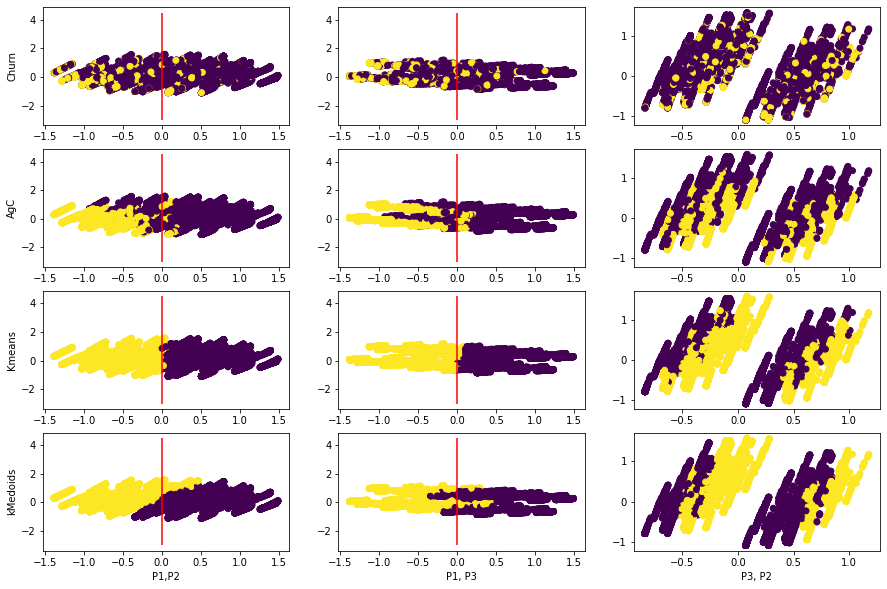

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
z = pca.fit_transform(X)
print(np.cumsum(pca.explained_variance_ratio_))

import matplotlib.pyplot as plt
fig, (ax1, ax2,ax3, ax4) = plt.subplots(4, 3, figsize = (15,10))

x1 = z[:,0]
x2 = z[:,1]
x3 = z[:,2]

y = y
y1 = label_AgC
y2 = np.where(label_KMeans == 0,1, 0 )
y3 = np.where(label_kMedoids == 0,1, 0 )

ax1[0].scatter(x1, x2, c = y)
ax1[0].vlines(x = 0, ymin = -3, ymax = 4.5, color ='r')
ax2[0].scatter(x1, x2, c = y1)
ax2[0].vlines(x = 0, ymin = -3, ymax = 4.5, color ='r')
ax3[0].scatter(x1, x2, c = y2)
ax3[0].vlines(x = 0, ymin = -3, ymax = 4.5, color ='r')
ax4[0].scatter(x1, x2, c = y3)
ax4[0].vlines(x = 0, ymin = -3, ymax = 4.5, color ='r')

ax1[1].scatter(x1, x3, c = y)
ax1[1].vlines(x = 0, ymin = -3, ymax = 4.5, color ='r')
ax2[1].scatter(x1, x3, c = y1)
ax2[1].vlines(x = 0, ymin = -3, ymax = 4.5, color ='r')
ax3[1].scatter(x1, x3, c = y2)
ax3[1].vlines(x = 0, ymin = -3, ymax = 4.5, color ='r')
ax4[1].scatter(x1, x3, c = y3)
ax4[1].vlines(x = 0, ymin = -3, ymax = 4.5, color ='r')

ax1[2].scatter(x3, x2, c = y)
ax2[2].scatter(x3, x2, c = y1)
ax3[2].scatter(x3, x2, c = y2)
ax4[2].scatter(x3, x2, c = y3)


ax1[0].set_ylabel('Churn')
ax2[0].set_ylabel('AgC')
ax3[0].set_ylabel('Kmeans')
ax4[0].set_ylabel('kMedoids')

ax4[0].set_xlabel('P1, P2')
ax4[1].set_xlabel('P1, P3')
ax4[2].set_xlabel('P3, P2')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
z = pca.fit_transform(X)

y = y
y1 = label_AgC
y2 = np.where(label_KMeans == 0,1, 0 )
y3 = np.where(label_kMedoids == 0,1, 0 )

--------------------
--------------------
--------------------
--------------------


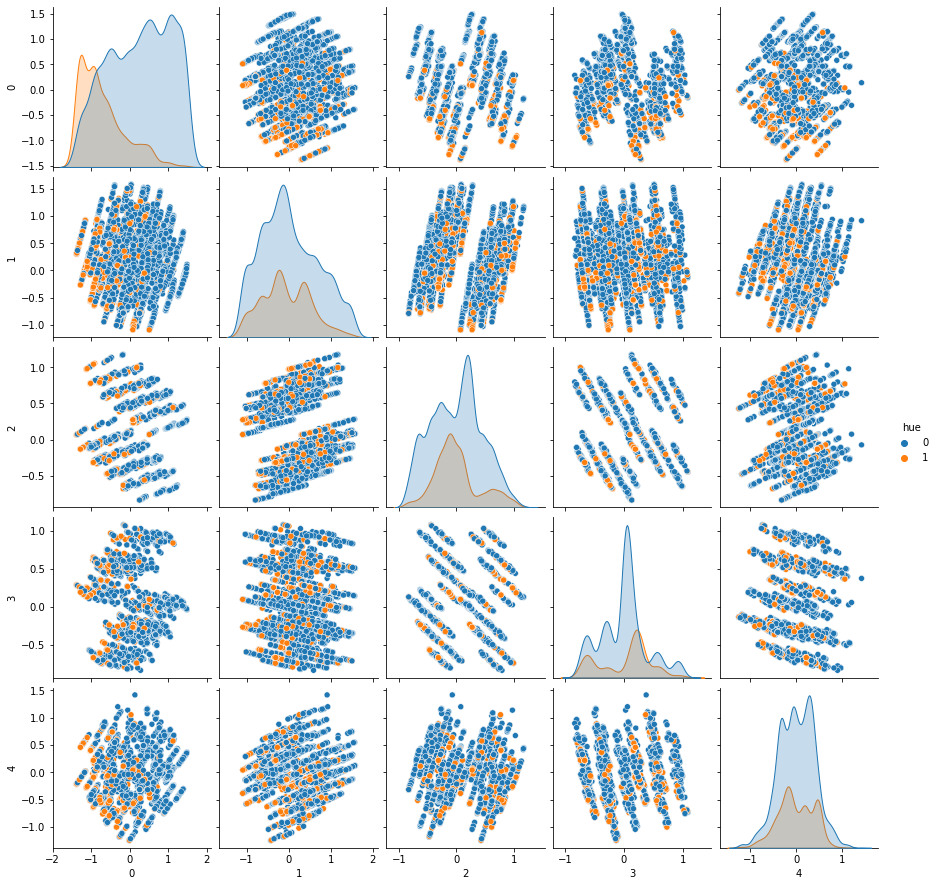

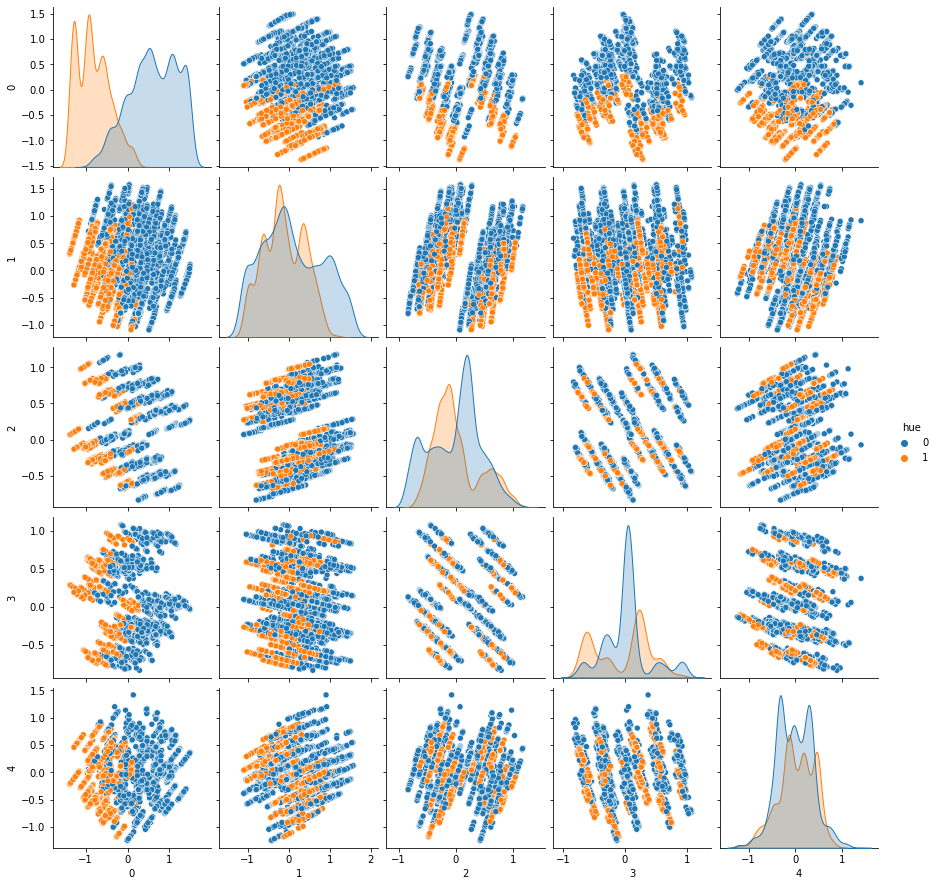

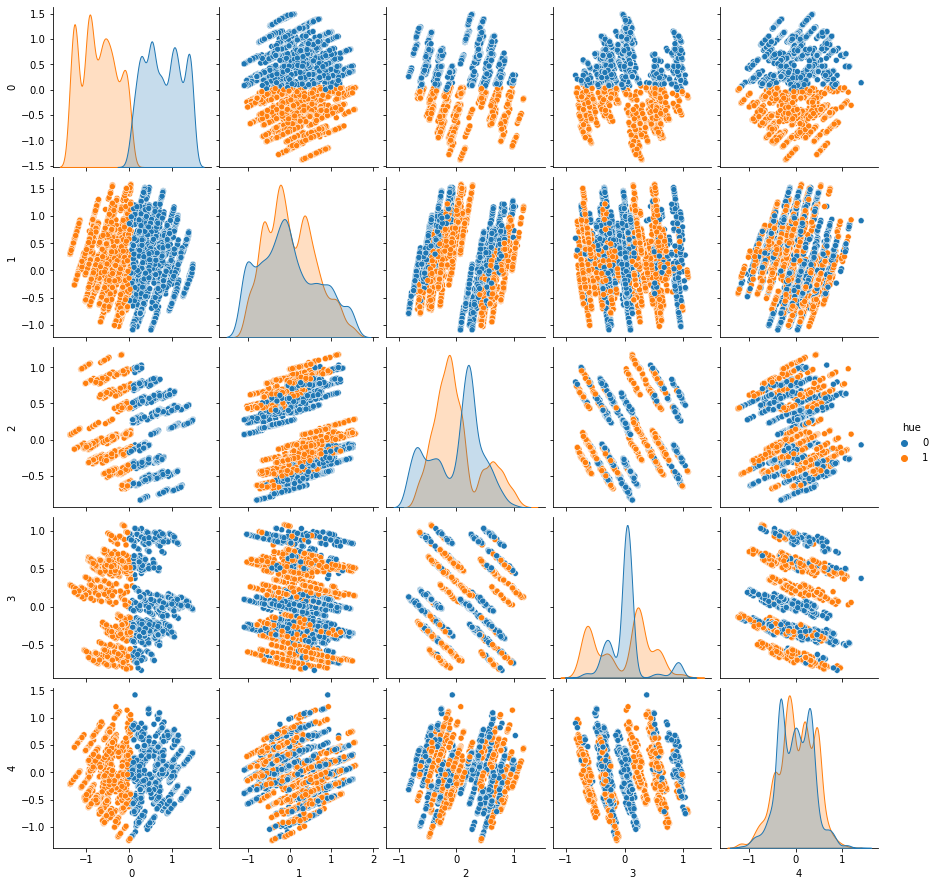

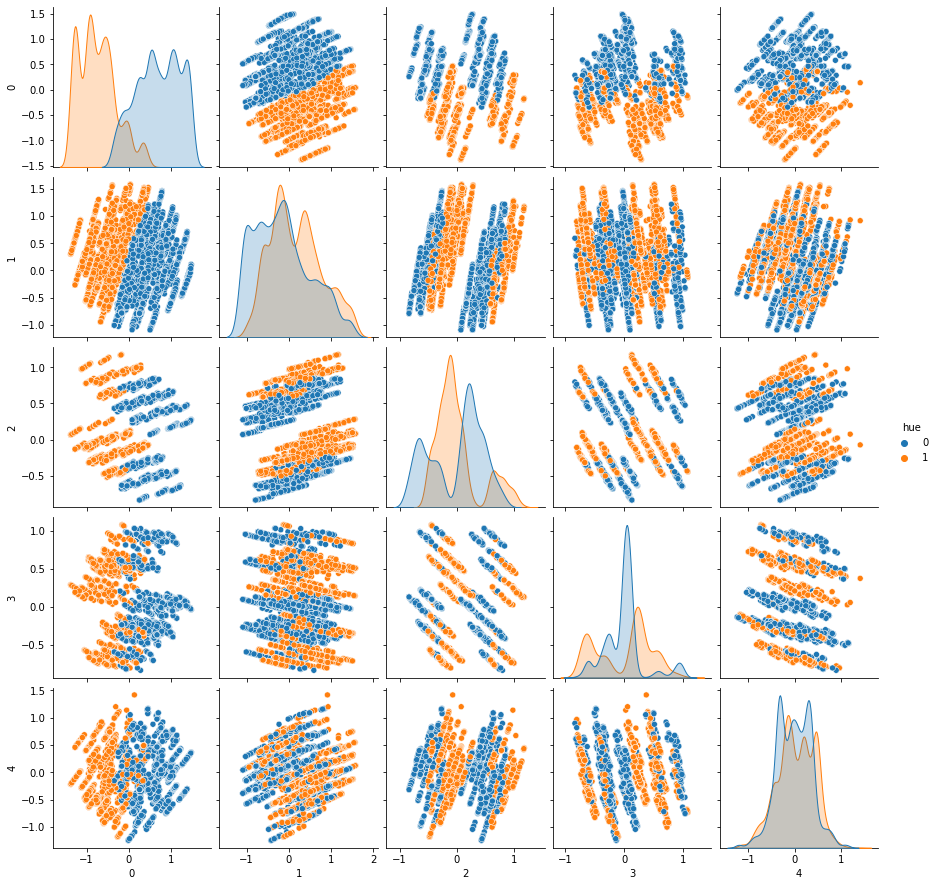

In [ ]:
import seaborn as sns
for i in [y.values, y1, y2, y3]:
    print('--------------------')
    Z = pd.DataFrame(z)
    Z['hue'] = i
    sns.pairplot(data = Z, hue = 'hue')

Al implementar los 3 modelos podemos observar que de los 3 modelos de clasificación el que me da un mejor accuracy es el de Aglomerative clustering, por otro lado el k means tiene mayor precisión, en resumen los 3 métodos tienen un f1 score similar, sin embargo viendo la clasificación de variables, la que mejor representación visual se encuentra entre el Kmedoids y el K means, por lo que para este conjunto de datos seleccionaremos el KMedoids.

---
---

## Referencias

Çelik, Özer. (2020). Examination of Feature Selection Methods and an Application. American Journal of Engineering Research, 9(4), 33-40. link:
https://www.researchgate.net/publication/341988460_Examination_of_Feature_Selection_Methods_and_an_Application

Fawcett, T. (2006). An introduction to ROC analysis. Pattern Recognition Letters, 27(8), 861-874. link: https://www.sciencedirect.com/science/article/abs/pii/S016786550500303X


Fridrich, Martin & Dostal, Petr. (2022). User churn model in e-commerce retail.cientific Papers of the Universityof Pardubice, 30(1) 1-12. link:
https://www.researchgate.net/publication/359739936_User_churn_model_in_e-commerce_retail


https://www.researchgate.net/publication/369113771_Customer_Churn_Prediction_Using_Four_Machine_Learning_Algorithms_Integrating_Feature_Selection_and_Normalization_in_the_Telecom_Sector


